# Bagging & Boosting KNN & Stacking
1. What is the fundamental idea behind ensemble techniques? How does bagging  differ from boosting in terms of approach and objective?
   - The fundamental idea behind ensemble techniques is to combine multiple individual models to create a more powerful and accurate predictive model. Instead of relying on a single weak learner, ensemble methods aggregate the predictions of several models to reduce errors and improve generalization. The key principle is that a group of diverse models working together can often outperform any single model. By combining different learners, ensemble methods help reduce variance, bias, or both, leading to better performance and stability across various datasets. Common ensemble techniques include bagging, boosting, stacking, and random forests.

    Bagging and boosting are two popular ensemble methods, but they differ significantly in their approach and objectives. Bagging, short for Bootstrap Aggregating, focuses on reducing variance by training multiple models independently on different random subsets of the data (created through bootstrapping). Each model votes equally in the final decision, which helps smooth out fluctuations caused by noise or overfitting in individual learners. A common example of bagging is the Random Forest algorithm. In contrast, boosting aims to reduce bias and improve accuracy by training models sequentially. Each new model tries to correct the mistakes made by the previous ones, giving more weight to the misclassified data points. This process creates a strong learner from many weak learners, as seen in algorithms like AdaBoost and Gradient Boosting.
2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.
   - A Random Forest Classifier reduces overfitting compared to a single decision tree by combining the predictions of multiple trees that are trained on different subsets of the data and features. A single decision tree tends to memorize the training data and capture noise, leading to high variance and poor generalization on unseen data. Random Forest, on the other hand, introduces randomness during training — both in sampling the data and selecting subsets of features — which ensures that not all trees make the same mistakes. When the predictions from all these diverse trees are aggregated (by majority voting in classification), the overall model becomes more stable, less sensitive to noise, and less prone to overfitting.

    Two key hyperparameters play an important role in controlling overfitting in a Random Forest. The first is n_estimators, which defines the number of trees in the forest. A larger number of trees generally improves model stability and accuracy, as it reduces variance through averaging. The second is max_features, which specifies how many features are considered when splitting a node. By limiting the number of features, each tree becomes more diverse, preventing them from all focusing on the same strong predictors. This randomness among trees enhances generalization and helps the Random Forest perform well even on complex datasets without significant overfitting.
3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.
   - Stacking, or Stacked Generalization, is an advanced ensemble learning technique that combines multiple different models (called base learners) to improve overall prediction performance. Instead of simply averaging or voting like in bagging and boosting, stacking uses another model — known as a meta-learner or blender — to learn how to best combine the predictions of the base models. The base learners might include different algorithms such as decision trees, logistic regression, or support vector machines, each capturing unique aspects of the data. The meta-learner then takes the outputs of these base models as inputs and learns the optimal way to blend them for the final prediction.

    Stacking differs from traditional bagging and boosting in its approach and purpose. In bagging (like Random Forest), multiple models of the same type are trained independently on random subsets of the data to reduce variance and avoid overfitting. In boosting (like AdaBoost or Gradient Boosting), models are trained sequentially, where each new model corrects the mistakes of the previous one to reduce bias. In contrast, stacking focuses on combining different types of models in parallel rather than in sequence, leveraging their individual strengths for better generalization.

    A simple example use case of stacking could be in a loan approval prediction system. A data scientist might use logistic regression to capture linear relationships, a decision tree to model non-linear patterns, and a random forest to capture complex interactions. These models’ predictions can then be fed into a meta-learner (like a gradient boosting model), which learns how to optimally combine their outputs to make the final decision. This layered approach often results in higher accuracy and better robustness than any single model alone.
4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?
   - The Out-of-Bag (OOB) Score in a Random Forest is an internal validation method used to estimate the model’s performance without needing a separate validation or test set. During the training of a Random Forest, each decision tree is trained on a random bootstrap sample of the dataset — meaning that some data points are randomly left out of that sample. These left-out data points are called out-of-bag samples. Once the model is trained, each tree can be tested on its own OOB samples, and the predictions are compared with the true labels to compute an overall accuracy score. This aggregated accuracy across all trees is known as the OOB Score.

    The OOB Score is particularly useful because it provides an unbiased estimate of the model’s generalization performance without the need to set aside a portion of the data for validation. This allows the Random Forest to make full use of all available data for both training and evaluation. Essentially, it works as an internal cross-validation mechanism, saving time and data resources. Since OOB evaluation is built into the training process, it offers a convenient and efficient way to monitor model performance, detect overfitting, and tune hyperparameters without the need for additional validation datasets.
5. Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
   - AdaBoost and Gradient Boosting are both popular boosting algorithms that combine multiple weak learners (typically decision trees) to form a strong predictive model. However, they differ in how they handle errors, adjust weights, and are applied in various use cases.

    In AdaBoost (Adaptive Boosting), the algorithm focuses on correcting the errors made by previous weak learners by adjusting the weights of the training samples. Initially, all data points are given equal weight, but after each iteration, the weights of misclassified samples are increased so that the next learner pays more attention to those harder-to-classify instances. This process continues sequentially, with each model improving on the weaknesses of the previous one. AdaBoost works best when the data is relatively clean and simple because it can be sensitive to noisy data and outliers due to its strong emphasis on misclassified points.

    In Gradient Boosting, instead of reweighting samples, the algorithm minimizes the overall prediction error by using gradient descent on a specified loss function. Each new tree is trained to predict the residual errors (differences) of the previous model’s predictions rather than adjusting sample weights. This allows Gradient Boosting to handle a wide variety of loss functions, making it more flexible and robust than AdaBoost. Gradient Boosting is commonly used in complex regression and classification problems where fine-tuned performance is needed, such as in financial modeling, healthcare predictions, and Kaggle competitions.
6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.
   - CatBoost performs exceptionally well on categorical features because it is specifically designed to handle them efficiently without requiring manual preprocessing like one-hot encoding or label encoding. Traditional machine learning models often struggle with categorical data because they require converting categories into numerical formats, which can lead to high dimensionality, information loss, or target leakage. CatBoost overcomes these challenges through its ordered encoding and target statistics mechanisms, which allow it to use categorical features directly during training.

    CatBoost uses a technique called “ordered target statistics” (or ordered encoding) to convert categorical values into numerical representations in a way that avoids overfitting. Instead of using the mean target value of a category based on the entire dataset (which would leak information from the target variable), CatBoost calculates these statistics in an ordered manner — that is, it computes them using only the part of the data seen before the current sample during training. This ensures that each transformation mimics how the model would see new, unseen data. Additionally, CatBoost uses combinations of categorical features to capture complex relationships automatically.


In [1]:
#7. KNN Classifier Assignment: Wine Dataset Analysis with Optimization
#Task:
#1. Load the Wine dataset (sklearn.datasets.load_wine()).
#2. Split data into 70% train and 30% test.
#3. Train a KNN classifier (default K=5) without scaling and evaluate using:
#a. Accuracy
#b. Precision, Recall, F1-Score (print classification report)
#4. Apply StandardScaler, retrain KNN, and compare metrics.
#5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
#6. Train the optimized KNN and compare results with the unscaled/scaled versions.

# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train KNN (default K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("---- KNN Without Scaling ----")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default))

# 4. Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("---- KNN With Scaling ----")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("---- GridSearchCV Results ----")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# 6. Train optimized KNN and compare results
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("---- Optimized KNN ----")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


---- KNN Without Scaling ----
Accuracy: 0.7407407407407407

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

---- KNN With Scaling ----
Accuracy: 0.9629629629629629

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

---- GridSearchCV Results ----
Best Parameters: {'metric': 'manhattan', 'n_

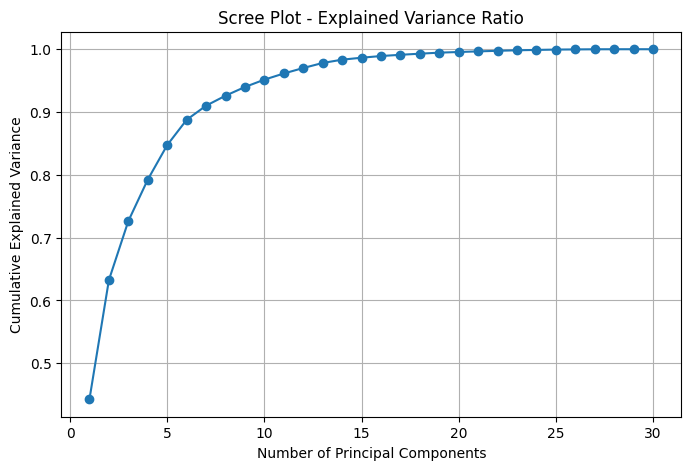

Number of components to retain 95% variance: 10
---- KNN Accuracy Comparison ----
Original Data Accuracy: 0.9591
PCA-Transformed Data Accuracy (95% variance): 0.9649


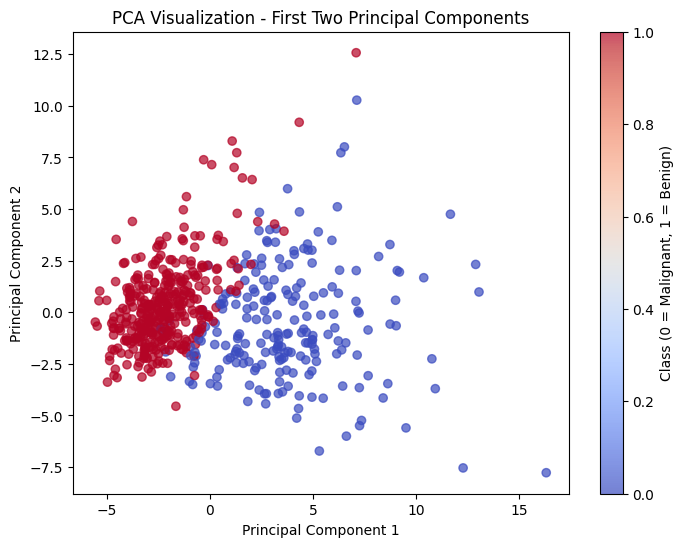

In [2]:
#8. PCA + KNN with Variance Analysis and Visualization
#Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).

# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot scree plot
pca = PCA()
pca.fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("Scree Plot - Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform dataset
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# 4. Train KNN on original and PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("---- KNN Accuracy Comparison ----")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA-Transformed Data Accuracy (95% variance): {acc_pca:.4f}")

# 5. Visualize the first two principal components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA Visualization - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class (0 = Malignant, 1 = Benign)")
plt.show()


---- KNN Regressor MSE Comparison ----
Euclidean Distance (K=5) MSE: 4837.0363
Manhattan Distance (K=5) MSE: 5428.5875


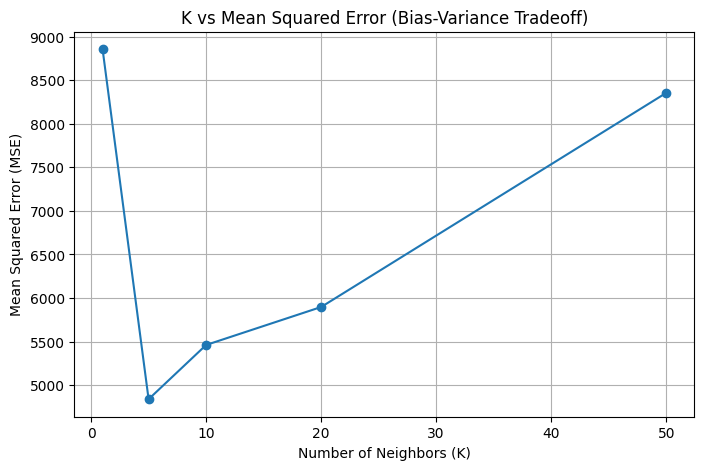

In [3]:
#9. KNN Regressor with Distance Metrics and K-Value Analysis
#Task:
#1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
#2. Train a KNN regressor with:
#a. Euclidean distance (K=5)
#b. Manhattan distance (K=5)
#c. Compare Mean Squared Error (MSE) for both.
#3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("---- KNN Regressor MSE Comparison ----")
print(f"Euclidean Distance (K=5) MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance (K=5) MSE: {mse_manhattan:.4f}")

# 3. Test K = 1, 5, 10, 20, 50 and plot K vs MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title("K vs Mean Squared Error (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


---- KNN Algorithm Comparison ----
Method: BRUTE | Accuracy: 0.7056 | Time: 0.0079 sec
Method: KD_TREE | Accuracy: 0.7056 | Time: 0.0093 sec
Method: BALL_TREE | Accuracy: 0.7056 | Time: 0.0088 sec

Best Performing Method: BRUTE


<Figure size 800x600 with 0 Axes>

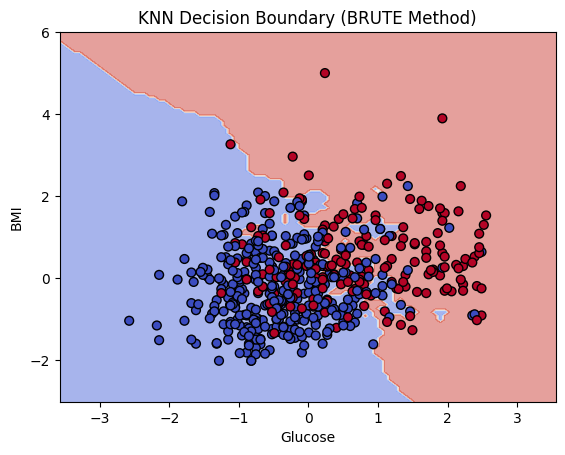

In [4]:
#10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
#Task:
#1. Load the Pima Indians Diabetes dataset (contains missing values).
#2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
#3. Train KNN using:
#a. Brute-force method
#b. KD-Tree
#c. Ball Tree
#4. Compare their training time and accuracy.
#5. Plot the decision boundary for the best-performing method (use 2 most important features).

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Load the Pima Indians Diabetes dataset
# You can download it or use a local CSV file if available.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
data = pd.read_csv(url, names=columns)

# Replace 0s with NaN in certain columns (as they represent missing values)
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# 2. Apply KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=columns)

# Split dataset
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train KNN using different algorithms
methods = ["brute", "kd_tree", "ball_tree"]
results = {}

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    results[method] = {"accuracy": acc, "time": end - start}

# 4. Compare training time and accuracy
print("---- KNN Algorithm Comparison ----")
for method, metrics in results.items():
    print(f"Method: {method.upper()} | Accuracy: {metrics['accuracy']:.4f} | Time: {metrics['time']:.4f} sec")

# 5. Plot decision boundary for the best-performing method
best_method = max(results, key=lambda x: results[x]["accuracy"])
print(f"\nBest Performing Method: {best_method.upper()}")

# Select two most important features (Glucose, BMI for visualization)
features = ["Glucose", "BMI"]
X_2d = data[features]
y = data["Outcome"]

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train_2d_scaled, y_train_2d)

# Plot decision boundary
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    knn_best, X_train_2d_scaled, response_method="predict",
    cmap="coolwarm", alpha=0.5
)
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train_2d, cmap="coolwarm", edgecolor="k", s=40)
plt.title(f"KNN Decision Boundary ({best_method.upper()} Method)")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()
